In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
min_value = -800
max_value = 1163
df = pd.DataFrame(
    {
        "Normal": np.linspace(min_value, max_value, 10000),
    }
)
new_df = df.copy()

In [100]:
new_df.max()

Normal    1163.0
dtype: float64

In [101]:
def gaussian_kernel(df):
    """
    Applies the Gaussian kernel transformation to each column of the DataFrame.
    Also plots the kernel function.
    """

    plt.figure(figsize=(15, 6))
    for col in df.columns:
        sigma = df[col].std()
        mu = df[col].mean()
        x_vals = np.linspace(-5 * sigma, 5 * sigma, 100000)
        kernel_vals = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x_vals**2) / (2 * sigma**2))
        print(kernel_vals.mean())
        print(kernel_vals.std())

        plt.plot(x_vals, kernel_vals, label=f"Gaussian Kernel - {col}")
        x_labels = [f"{i}*o'+mu" for i in np.arange(-5, 6, 1)]
        print(mu)
        plt.xticks(np.arange(-5 * sigma, 6 * sigma, sigma), x_labels)

    plt.legend()
    plt.title("Gaussian Kernel Function")
    plt.show()

    return df.transform(lambda x: (1 / (np.sqrt(2 * np.pi) * x.std())) * np.exp(-(x**2) / (2 * x.std() ** 2)))


def paper_kernel(df, mu=0, zeta=1.0):
    """
    Applies the kernel transformation from the paper to each column in the DataFrame.
    The transformation follows the formula: exp(-zeta * ||mu - x||^2).
    Also plots the kernel function.
    """

    return df.transform(lambda x: np.exp(-zeta * (mu - x) ** 2))


col_names = list(new_df.columns)
# transformed_gaussian = gaussian_kernel(df)
for zeta in [0.00001]:
    for mu in np.linspace(-1000, 1000, 4):
        transformed_df = paper_kernel(df, mu=mu, zeta=zeta)
        mu = round(mu, 2)
        col_names.append(f"Zeta={zeta}, mu={mu}")
        new_df = pd.concat([new_df, transformed_df], axis=1, names=col_names)

new_df.columns = col_names

In [102]:
mu_list = np.round(np.linspace(0, 1, 4), 2)  # round to 2 decimals
zeta_list = [10]


In [103]:
new_df.describe()

,Normal,"Zeta=1e-05, mu=-1000.0","Zeta=1e-05, mu=-333.33","Zeta=1e-05, mu=333.33","Zeta=1e-05, mu=1000.0"
count,10000.000000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04
mean,181.500000,5.300772e-02,2.802431e-01,0.285474,2.190155e-01
std,566.754297,1.341584e-01,3.507689e-01,0.346984,3.513004e-01
min,-800.000000,4.799909e-21,1.888375e-10,0.000003,8.489044e-15
25%,-309.250000,7.166444e-13,4.059048e-05,0.004428,3.594222e-08
50%,181.500000,8.659662e-07,7.061355e-02,0.089920,1.231624e-03
75%,672.250000,8.468897e-03,5.475804e-01,0.547574,3.415707e-01
max,1163.000000,6.703200e-01,1.000000e+00,1.000000,1.000000e+00


Zeta=1e-05, mu=-1000.0
Zeta=1e-05, mu=-333.33
Zeta=1e-05, mu=333.33
Zeta=1e-05, mu=1000.0


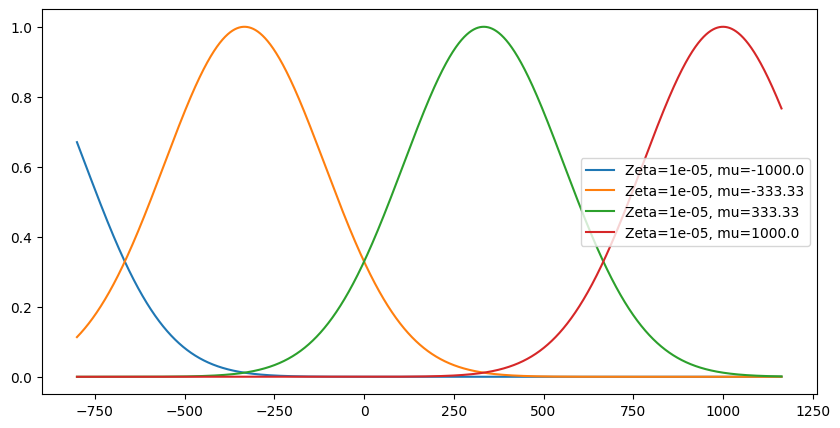

In [104]:
# 15 cm width ≈ 5.9 inches
plt.figure(figsize=(10, 5))  # width, height in inches
for i in range(len(new_df.columns)-1):
    i= i+1
    col = new_df.columns[i]
    print(col)
    plt.plot(new_df[new_df.columns[0]],new_df[col], label=col)
plt.legend()
plt.show()

In [105]:
5.9/3.5

1.6857142857142857